In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('../data/processed/evtx_features.csv')
df.head()

,time,host,total_events,event_1,event_3,event_8,event_10,event_11,event_12,event_4624,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
0,576,MSEDGEWIN10,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,578,MSEDGEWIN10,4,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,583,MSEDGEWIN10,5,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,676,MSEDGEWIN10,6,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,680,MSEDGEWIN10,7,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
columns = list(df.columns)

In [38]:
features = columns[3:]
features

['event_1',
 'event_3',
 'event_8',
 'event_10',
 'event_11',
 'event_12',
 'event_4624',
 'event_4625',
 'event_4648',
 'event_4658',
 'event_4661',
 'event_4663',
 'event_4672',
 'event_4698',
 'event_4768',
 'event_5140',
 'event_5145',
 'event_5156',
 'event_5158']

In [39]:
# Separating out the features
X = df.loc[:, features].values

In [40]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [41]:
X

array([[-0.63723564, -0.45271291, -0.17710426, ..., -0.14983784,
        -0.14582513, -0.13534633],
       [-0.63723564,  0.02674253, -0.17710426, ..., -0.14983784,
        -0.14582513, -0.13534633],
       [-0.58788985,  0.02674253, -0.17710426, ..., -0.14983784,
        -0.14582513, -0.13534633],
       ...,
       [-0.68658143, -0.21298519, -0.17710426, ..., -0.14983784,
        -0.14582513, -0.13534633],
       [-0.68658143,  0.02674253, -0.17710426, ..., -0.14983784,
        -0.14582513, -0.13534633],
       [-0.68658143, -0.45271291, -0.17710426, ..., -0.14983784,
        -0.14582513, -0.13534633]])

In [42]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

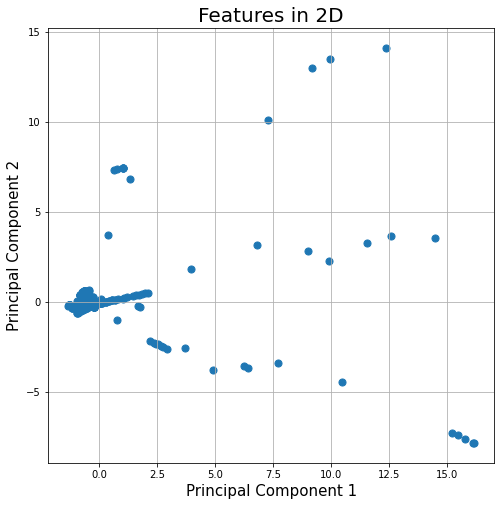

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Features in 2D', fontsize = 20)
ax.scatter(pca_df['pc1']
               , pca_df['pc2']
               , s = 50)
ax.grid()

In [59]:
outliers_index = list(pca_df[pca_df.pc1>2.4].index)

In [60]:
df.iloc[outliers_index]

,time,host,total_events,event_1,event_3,event_8,event_10,event_11,event_12,event_4624,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
543,41243,PC01.example.corp,5,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
580,64939,PC01.example.corp,31,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,8,0
581,65008,PC01.example.corp,32,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,9,0
582,65009,PC01.example.corp,34,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,11,0
583,65012,PC01.example.corp,35,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,12,0
584,65016,PC01.example.corp,37,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,14,0
585,65041,PC01.example.corp,45,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,19,3
586,65083,PC01.example.corp,49,14,0,0,0,0,0,3,...,0,0,0,1,0,0,0,12,21,3
587,65085,PC01.example.corp,51,14,0,0,0,0,0,3,...,0,0,0,1,0,0,0,12,23,3
588,65097,PC01.example.corp,54,14,0,0,0,0,0,4,...,0,0,0,2,0,0,0,12,24,3


In [124]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
clf_svm = OneClassSVM(kernel='rbf', nu=0.01)
print(clf_svm)

OneClassSVM(nu=0.01)


In [125]:
clf_svm.fit(pcs)

OneClassSVM(nu=0.01)

In [126]:
pred = clf_svm.predict(pcs)

In [127]:
anom_index = where(pred==-1)
values = pcs[anom_index]

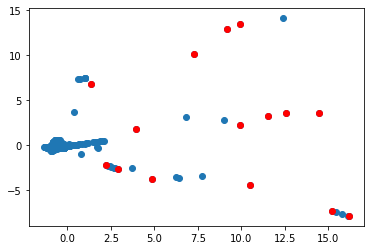

In [128]:
plt.scatter(pcs[:,0], pcs[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

In [136]:
df.iloc[list(anom_index[0])]

,time,host,total_events,event_1,event_3,event_8,event_10,event_11,event_12,event_4624,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
134,49027,MSEDGEWIN10,10,5,0,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,0
578,64924,PC01.example.corp,28,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,5,0
584,65016,PC01.example.corp,37,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,14,0
585,65041,PC01.example.corp,45,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,19,3
589,65098,PC01.example.corp,65,14,0,0,0,0,0,5,...,0,0,0,3,0,0,0,12,32,3
590,65118,PC01.example.corp,91,14,0,0,0,0,0,5,...,0,0,0,3,0,0,0,12,52,9
594,65958,PC01.example.corp,113,0,0,0,0,0,0,5,...,0,0,0,3,0,0,0,30,63,9
666,124,WIN-77LTAPHIQ1R.example.corp,14,0,0,0,0,0,0,4,...,0,0,0,3,2,0,2,3,0,0
667,127,WIN-77LTAPHIQ1R.example.corp,18,0,0,0,0,0,0,4,...,0,0,0,3,2,0,4,5,0,0
668,137,WIN-77LTAPHIQ1R.example.corp,21,0,0,0,0,0,0,4,...,0,3,0,3,2,0,4,5,0,0
